In [97]:
import numpy as np
import sys
sys.path.append("..") 
from helper import index
import matplotlib.pyplot as plt
from numpy import random, nanmax, argmax, unravel_index
from scipy.spatial.distance import pdist, squareform

In [56]:
def find_max_distance(A):
    """
    Returns the maximum distance from  2x points
    each point is represented by a x,y cord.
    """
    #assert(A.shape[1] == 2)
    return nanmax(squareform(pdist(A)))

In [57]:
def get_max_distance_from_list(clusters):
    """
    Wrapper around find_max_distance
    to handle a list of 'clusters'
    """
    return list(map(find_max_distance, clusters))

In [58]:
get_max_distance_from_list([np.random.randint(1,100,(5,2)),
                            np.random.randint(1,100,(5,2)),
                            np.random.randint(1,100,(5,2)),
                            np.random.randint(1,100,(5,2))])

[63.324560795950255, 81.78630692236935, 117.5925167687128, 94.847245611035]

In [70]:
def removeIslands(arr, threshold):
    newArr = arr.copy()
    examinedPoints = []
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            if arr[i][j] == 1 and (i, j) not in examinedPoints:
                island = getIslandArray(arr, (i, j))
                islandSize = len(island)
                cluster_distance = find_max_distance(island)
                print(cluster_distance)
                for k in range(islandSize):
                    examinedPoints.append(island[k])
                    if cluster_distance < threshold:
                        newArr[island[k][0]][island[k][1]] = 0
    return newArr


def getIslandArray(arr, index):
    arrayOfPoints = []
    iMax = len(arr) - 1
    jMax = len(arr[0]) - 1
    i = index[0]
    j = index[1]
    FIFOQueue = deque([(i, j)])
    examinedElements = [(i, j)]
    while (len(FIFOQueue) > 0):
        currentIndex = FIFOQueue.popleft()
        i = currentIndex[0]
        j = currentIndex[1]
        if i >= 0 and i < iMax and j >= 0 and j < jMax and arr[i][j] == 1:
            arrayOfPoints.append((i, j))
            if (i+1, j) not in examinedElements:
                FIFOQueue.append((i+1, j))
                examinedElements.append((i+1, j))
            if (i-1, j) not in examinedElements:
                FIFOQueue.append((i-1, j))
                examinedElements.append((i-1, j))
            if (i, j+1) not in examinedElements:
                FIFOQueue.append((i, j+1))
                examinedElements.append((i, j+1))
            if (i, j-1) not in examinedElements:
                FIFOQueue.append((i, j-1))
                examinedElements.append((i, j-1))
    return arrayOfPoints

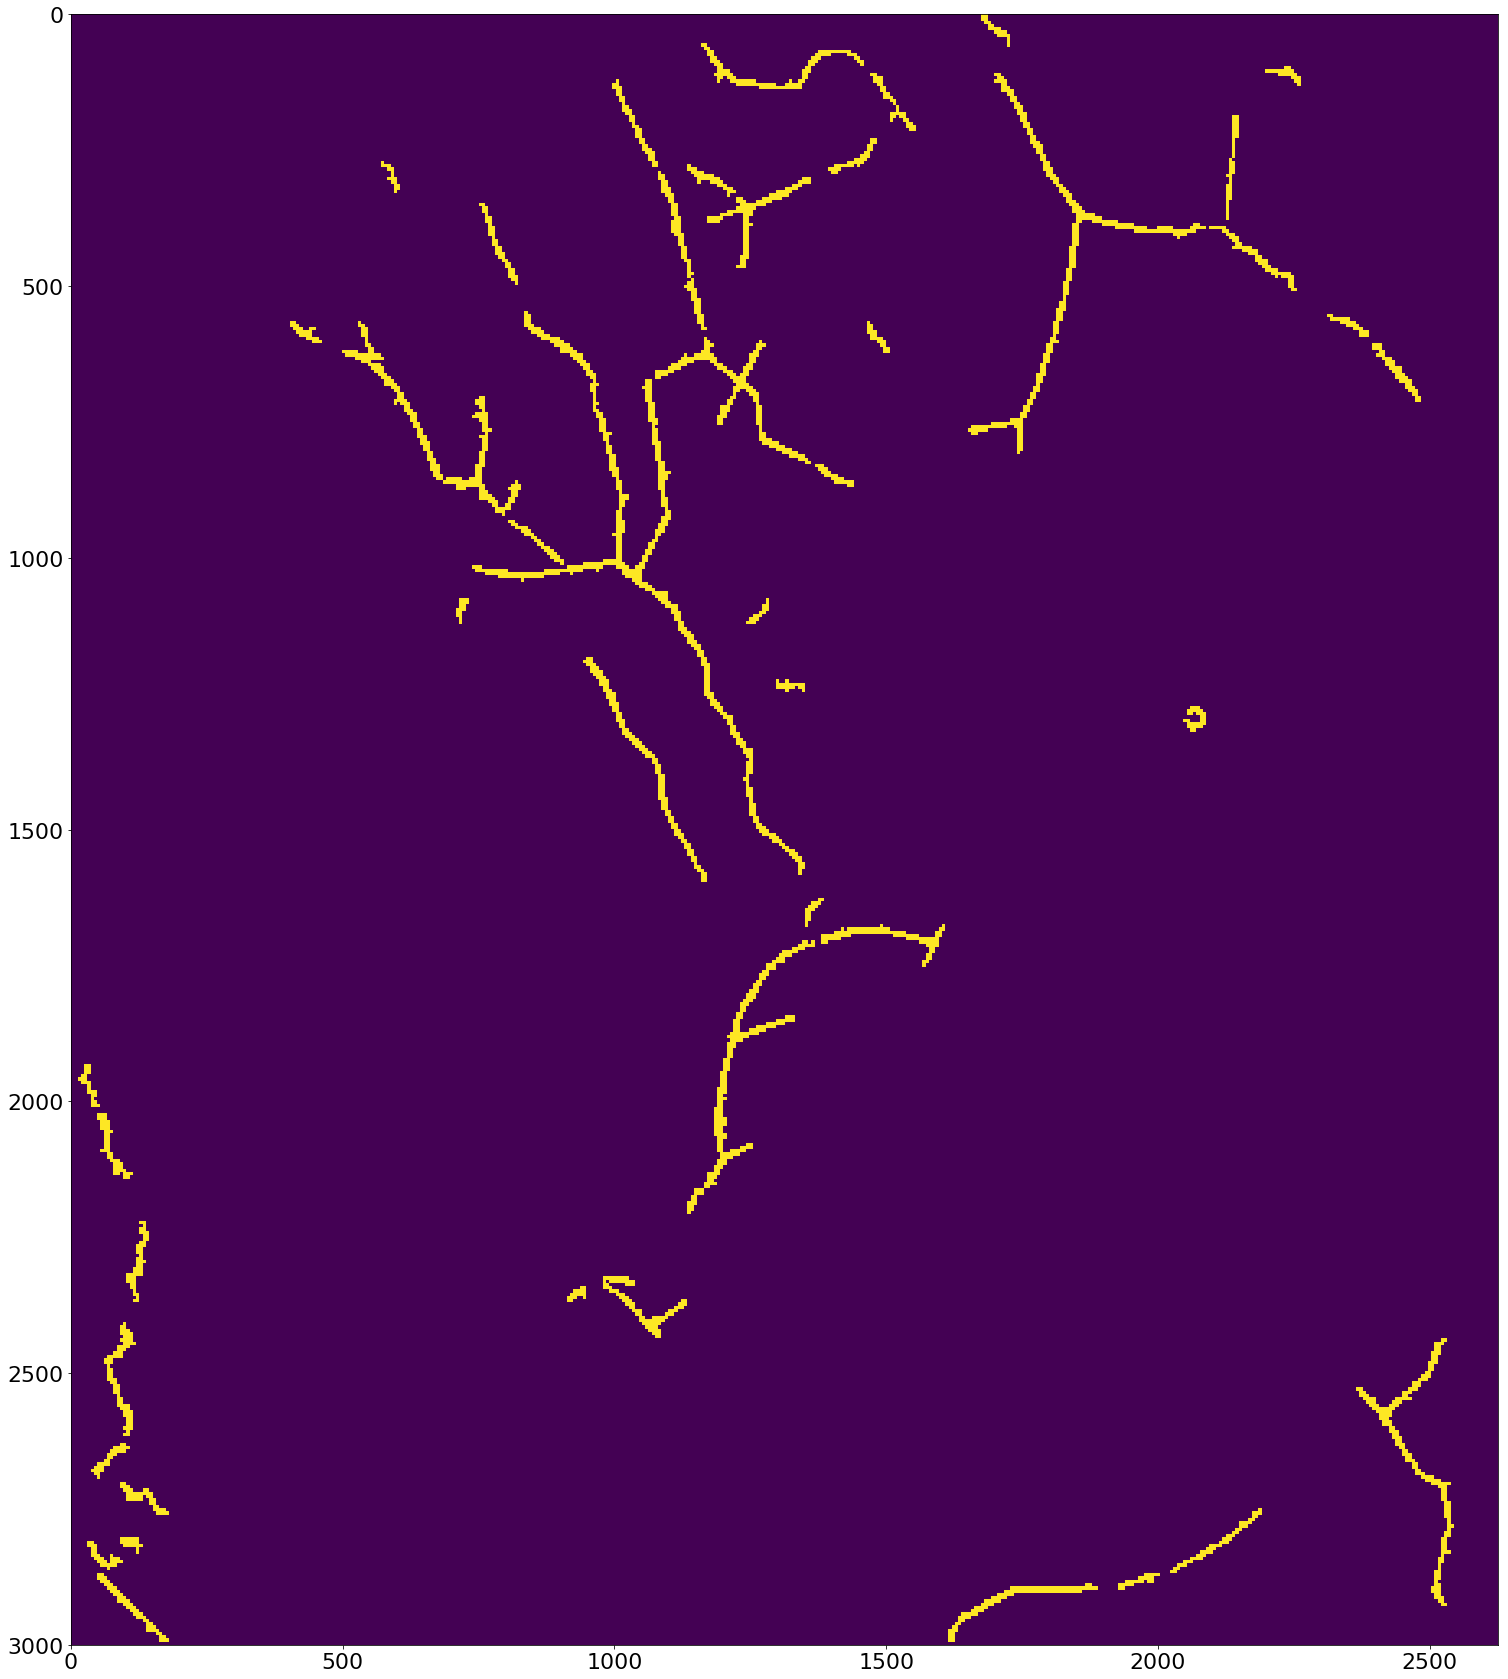

In [76]:
pred = np.load("new_noise_reduction_fifo.npy")
plt.figure(num=None, figsize=(30,30), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size':22})
plt.imshow(pred)

In [74]:
new_pred = removeIslands(pred, 75)

79.30952023559341
301.7979456523851
71.17583859709698
75.43208866258443
702.5738395357458
178.46568297574746
58.60034129593445
77.78174593052023
106.78014796768171
113.53413583587978
65.7419196555744
103.58571330062848
205.64532574313475
216.00462958001617
165.05150711217394
200.20489504505127
99.32774033471213
1155.1839680327978
87.23531395025755
71.84705978674423
331.4724724618924
71.84705978674423
335.1089375113711
139.17614738165446
225.94247055390008
81.98780397107853
130.728726758888
49.9799959983992
62.369864518050704
468.4122116256151
57.77542730261716
49.9799959983992
63.51377803280167
229.68238939892626
498.23087017967885
82.28000972289685
132.82319074619463
55.226805085936306
150.7647173578752
163.8108665504215
45.45327270945405
209.28927349484493
491.1232024655321
85.14693182963201
106.78014796768171
205.0609665440988
45.45327270945405
76.8505042273634
181.06904760339356
82.28000972289685
292.9607482240582


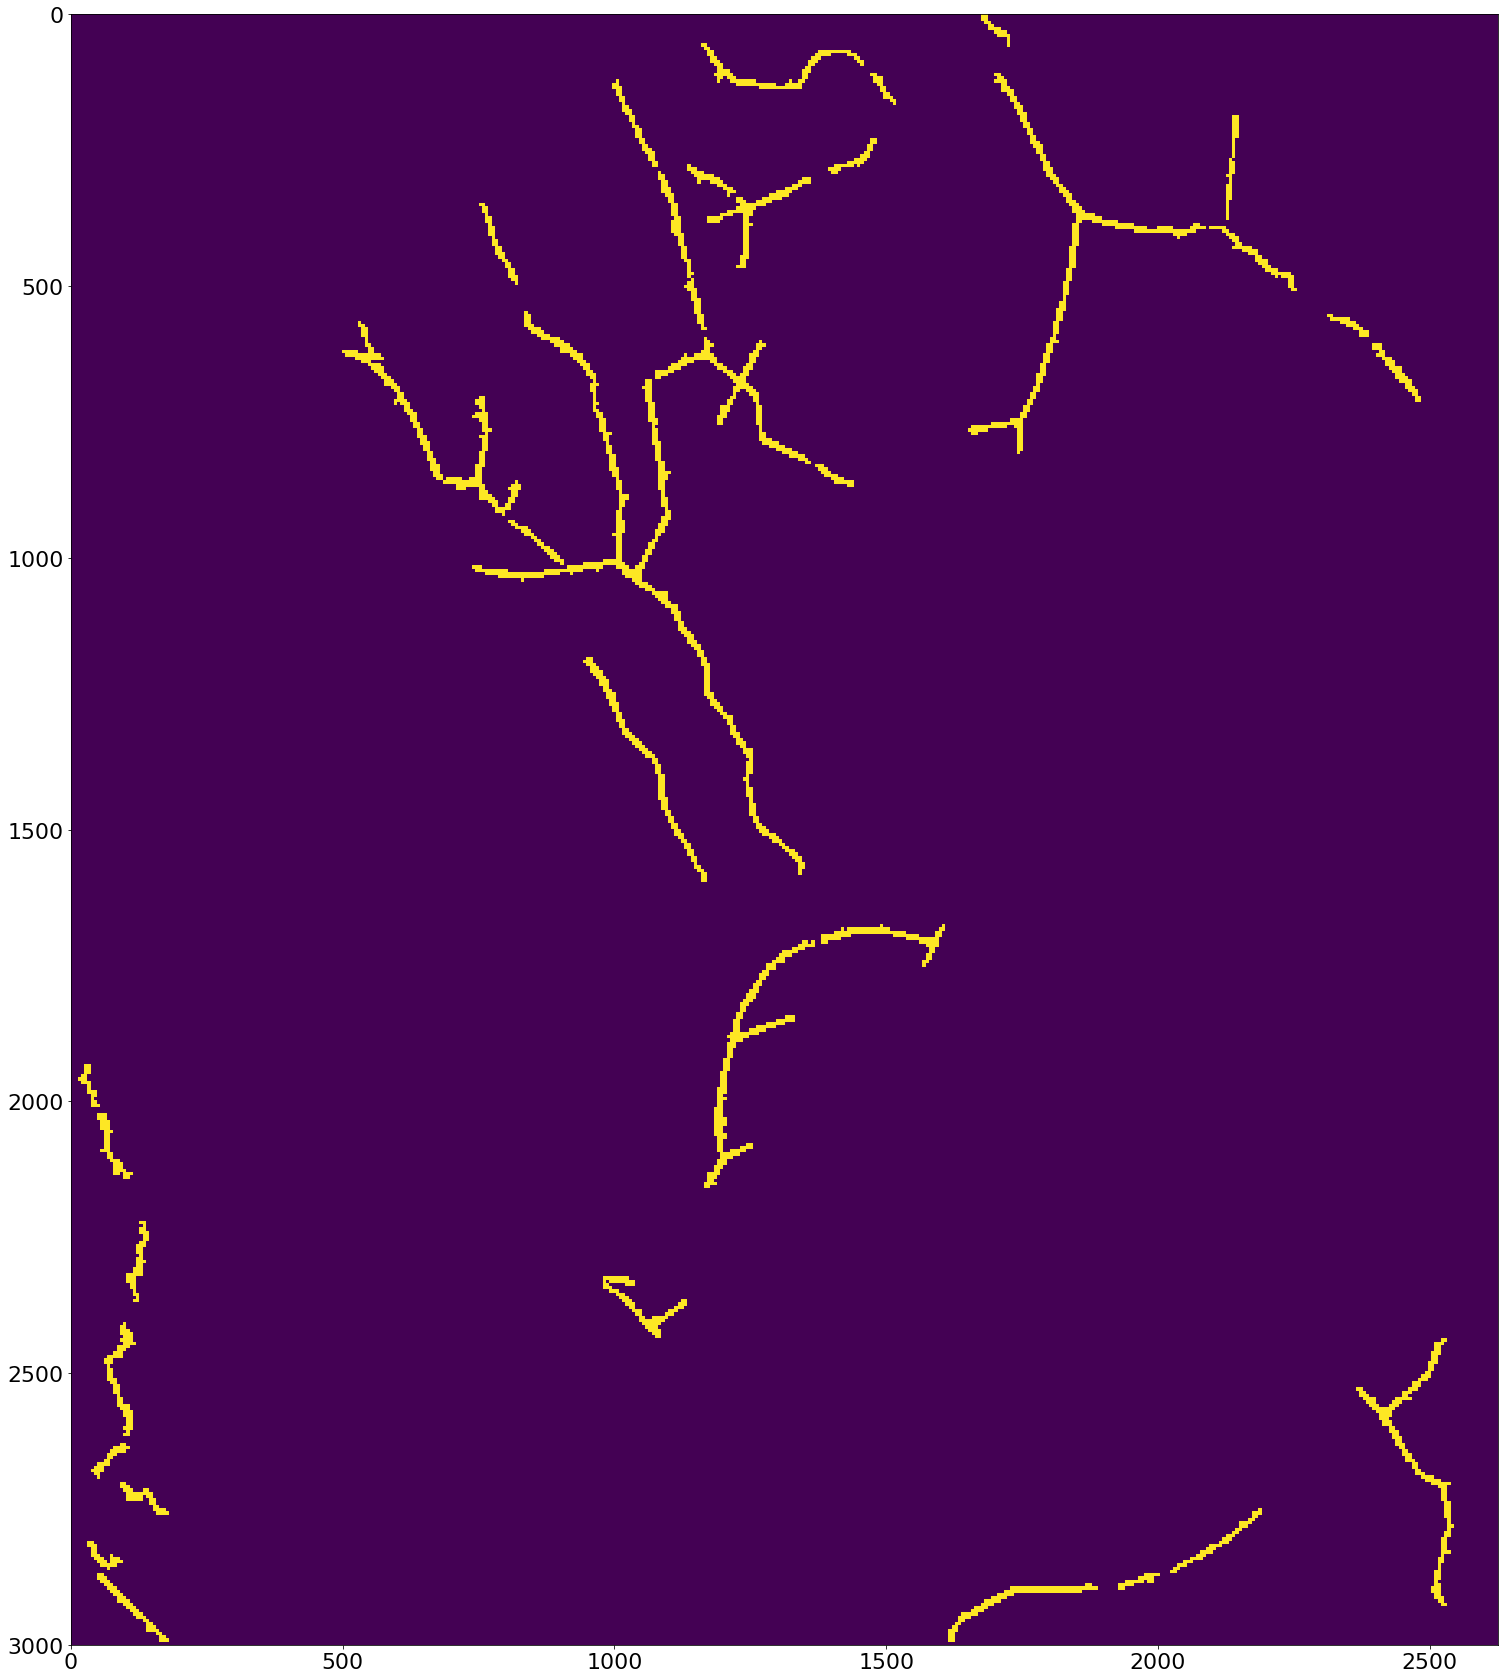

In [75]:
plt.figure(num=None, figsize=(30,30), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size':22})
plt.imshow(new_pred)

In [87]:
from skimage.morphology import binary_closing

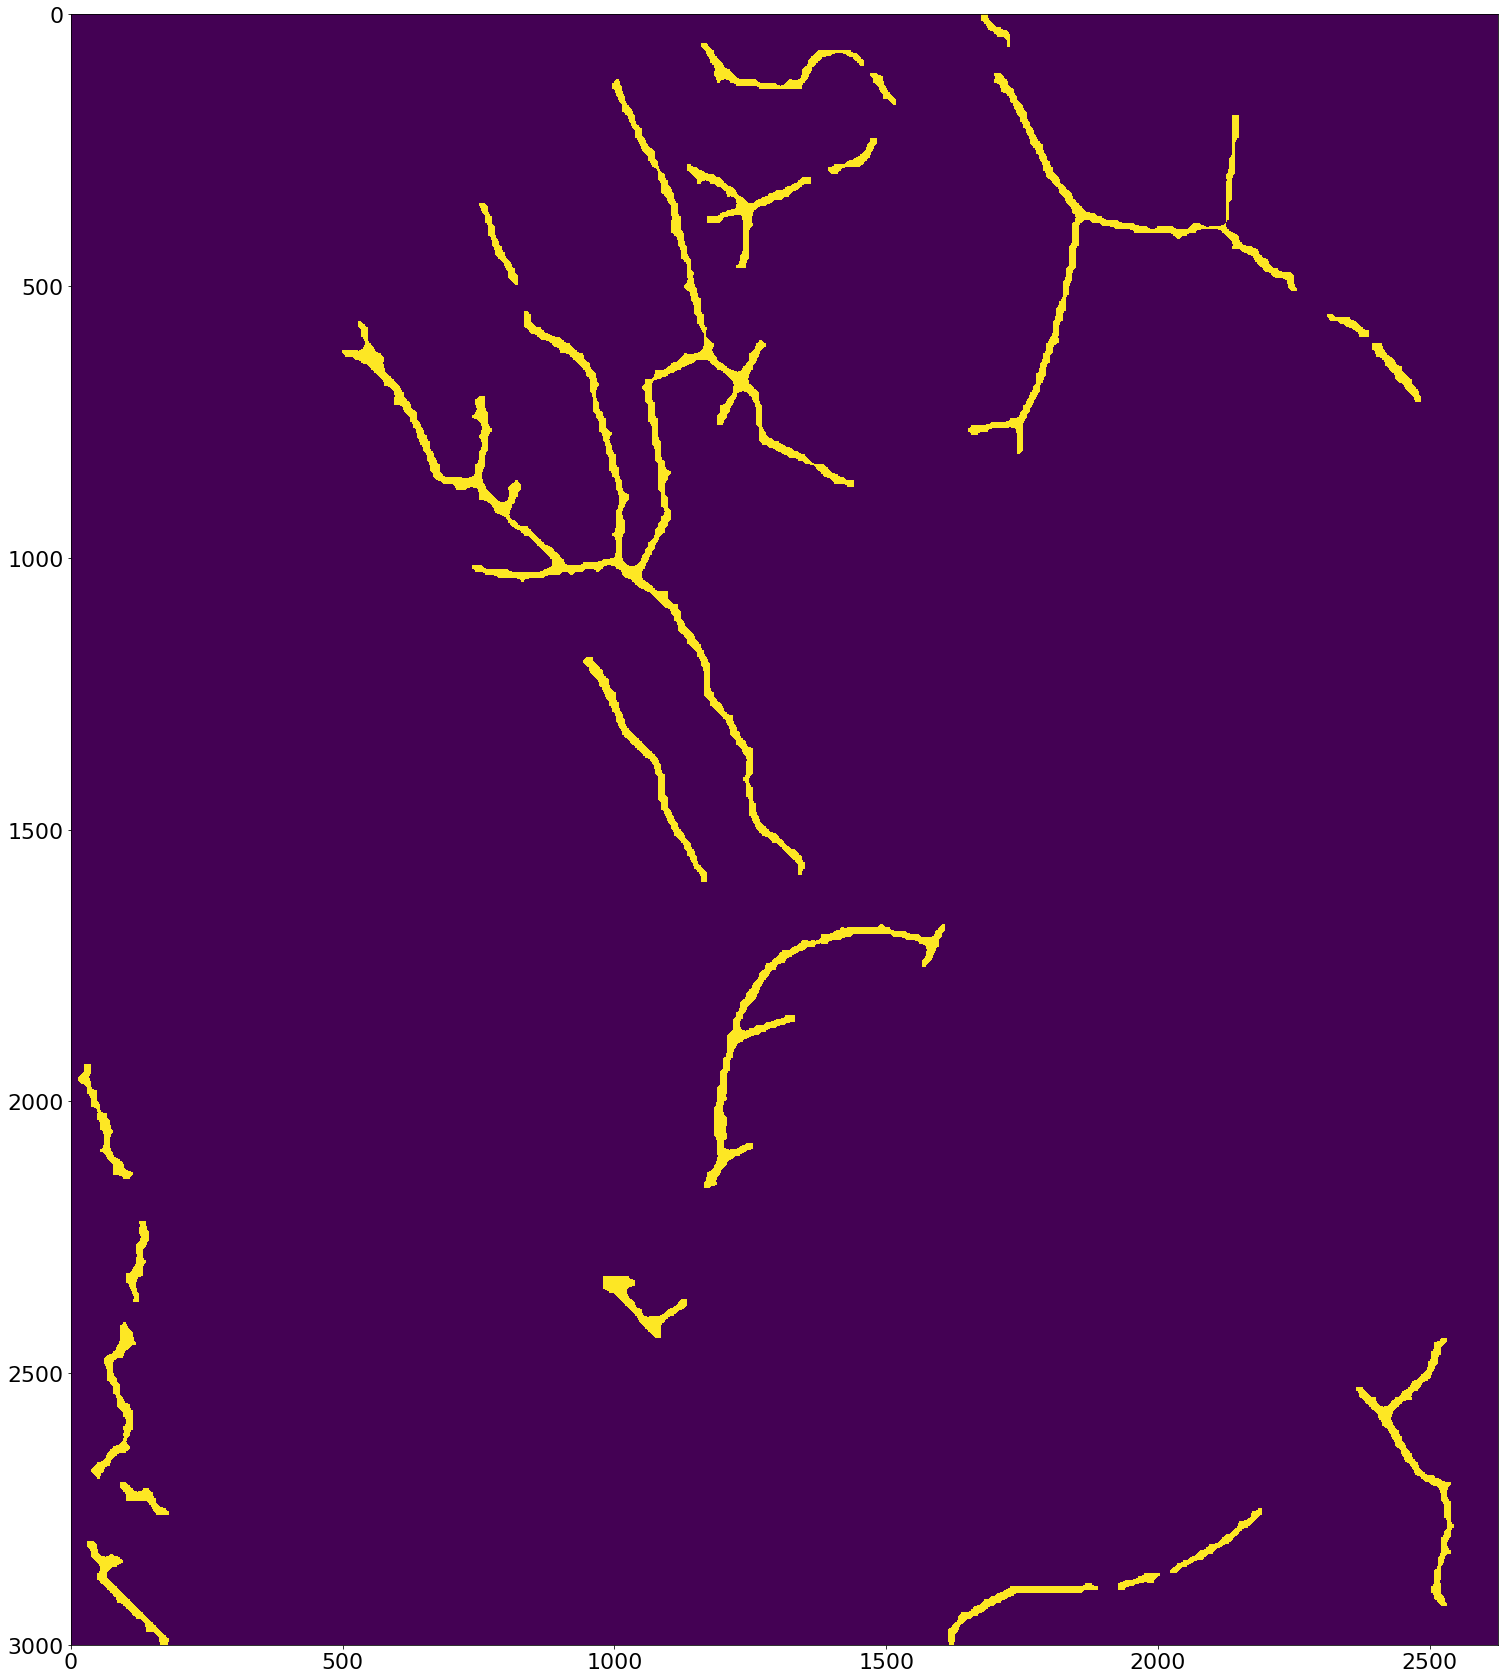

In [100]:

mask = index.circel_mask_generator(10)
binary_data = binary_closing(new_pred, mask)
plt.figure(num=None, figsize=(30,30), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size':22})
plt.imshow(binary_data)